In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")




# Getting an Idea of what the data looks like

In [3]:
df = pd.read_csv('Qualitative_Bankruptcy.data.csv')
df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


Text(0.5, 1.0, 'Class')

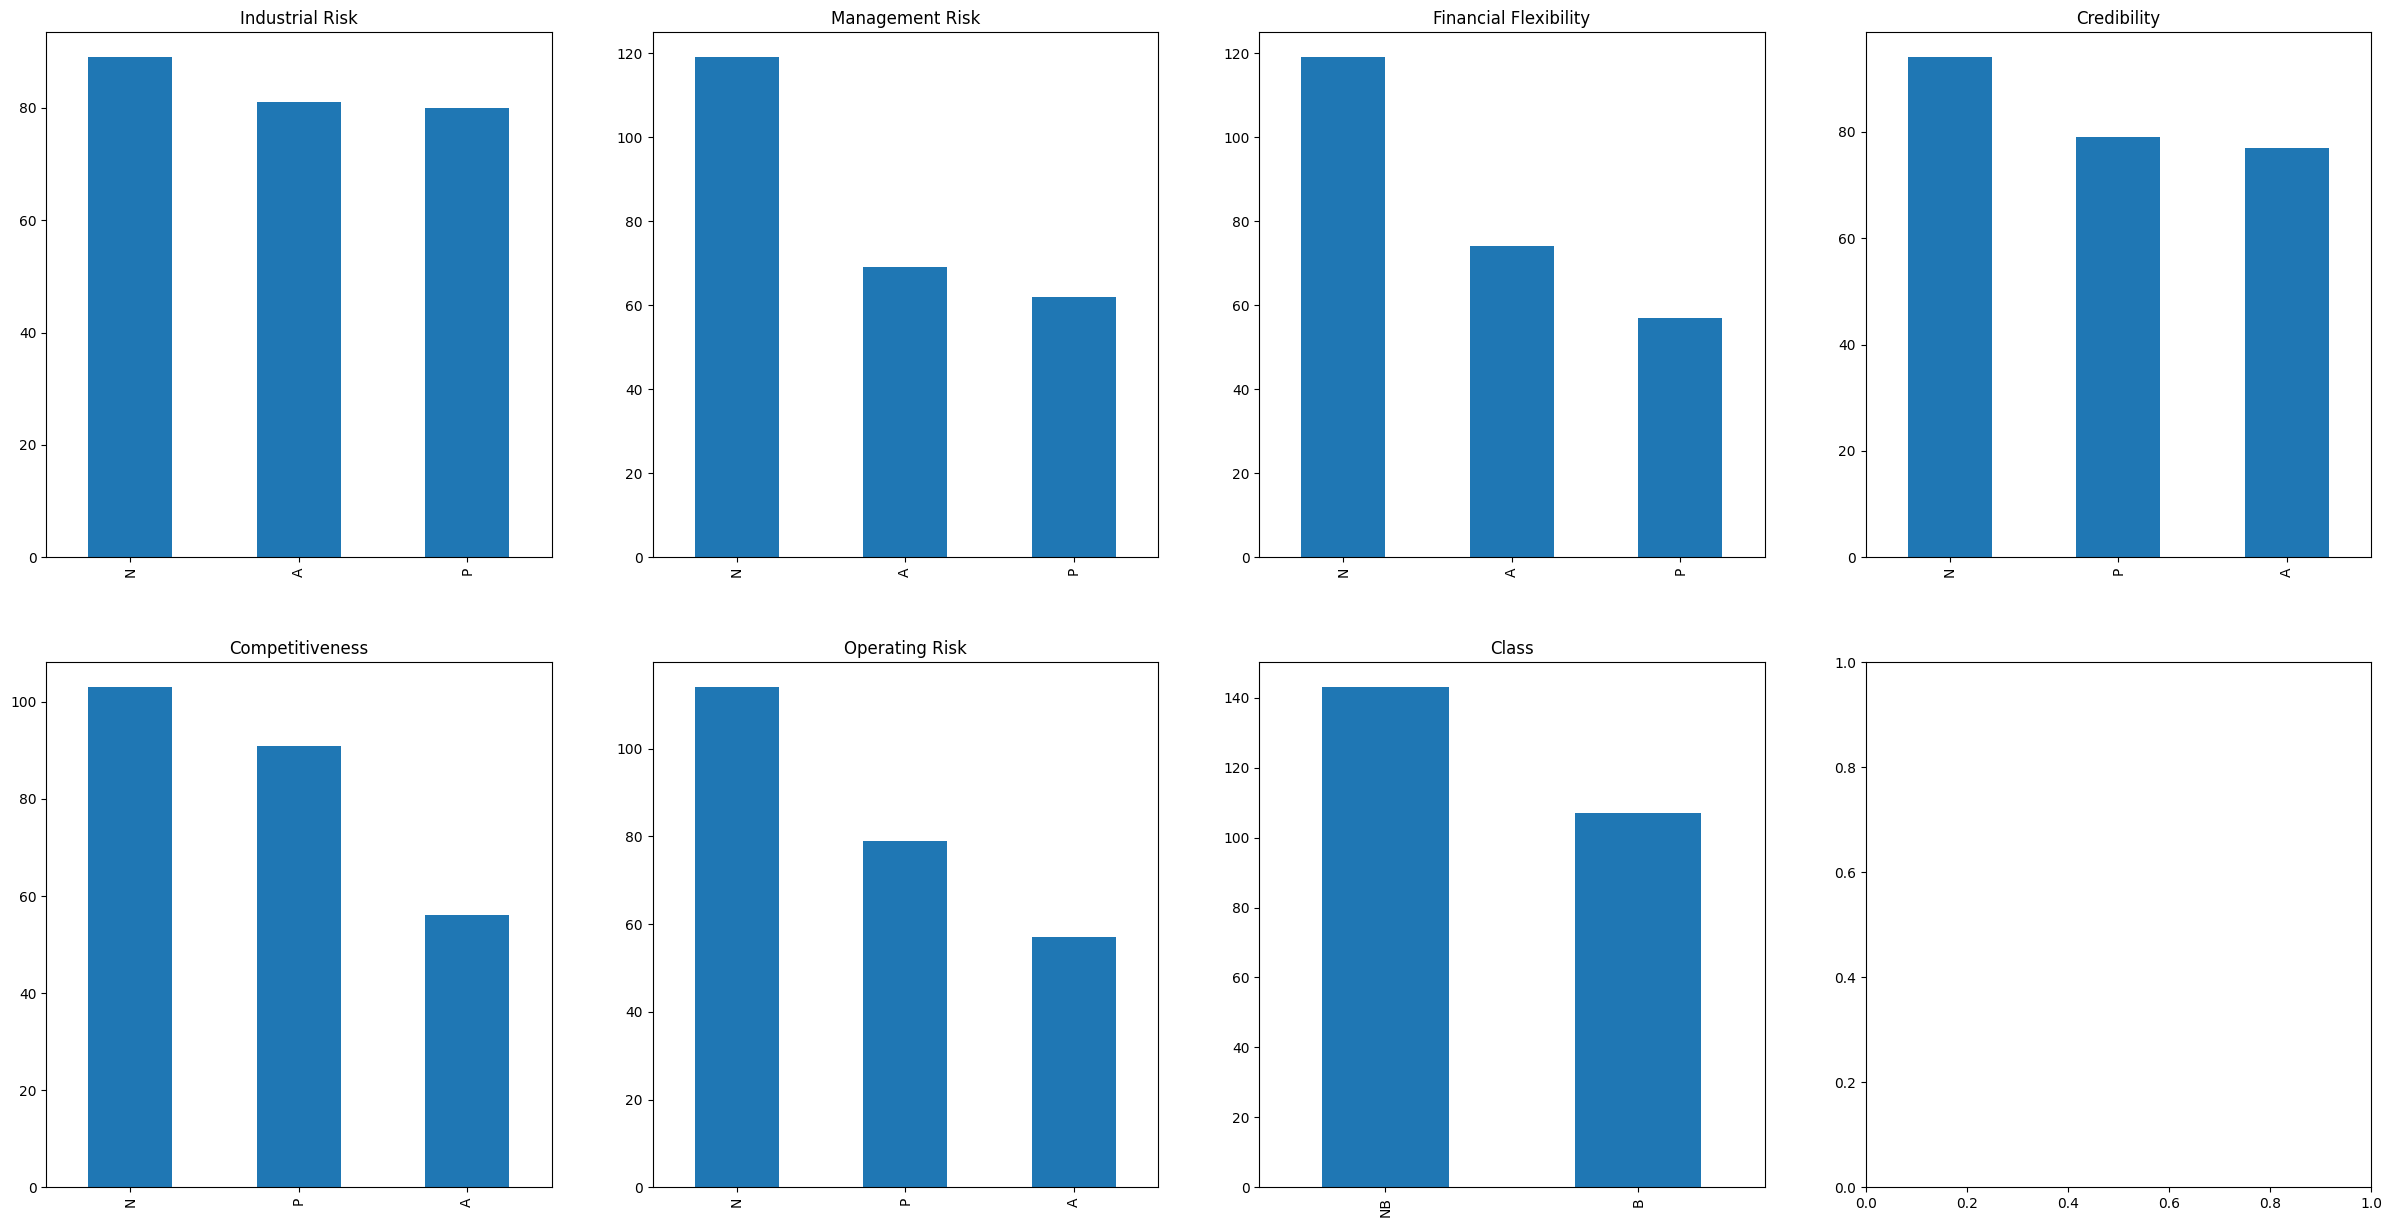

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))

df['Industrial Risk'].value_counts().plot(kind='bar',ax=axes[0,0], )
axes[0,0].set_title("Industrial Risk")

df['Management Risk'].value_counts().plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title("Management Risk")

df['Financial Flexibility'].value_counts().plot(kind='bar',ax=axes[0,2])
axes[0,2].set_title("Financial Flexibility")

df['Credibility'].value_counts().plot(kind='bar',ax=axes[0,3])
axes[0,3].set_title("Credibility")

df['Competitiveness'].value_counts().plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title("Competitiveness")

df['Operating Risk'].value_counts().plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title("Operating Risk")

df['Class'].value_counts().plot(kind='bar',ax=axes[1,2])
axes[1,2].set_title("Class")







0 0
0 1
0 2
0 3
1 0
1 1
1 2


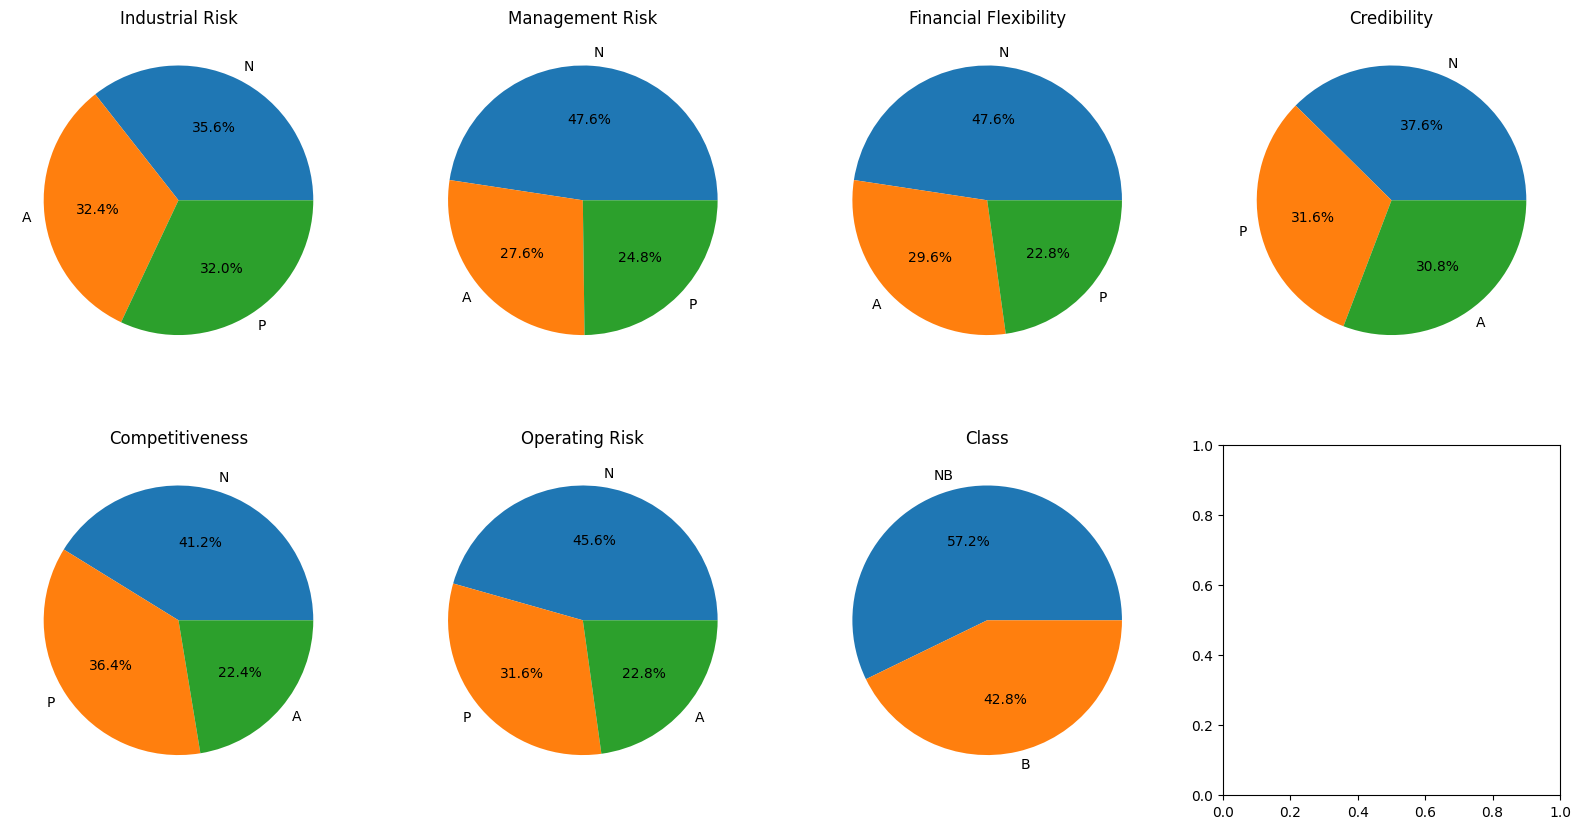

In [5]:
# Get the names of the 8 columns
columns = df.columns

# Create a subplot with 8 plots, one for each column
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

row = 0
col = 0
# Loop through the 8 columns
for i, column in enumerate(columns):
  # Calculate the class distribution for each column
  class_counts = df[column].value_counts()
  n_instances = 768
  class_percentages = (class_counts / n_instances)
  
  # Get the row and column index of the current plot
  if( col > 3):
    row += 1
    col = 0

  print(row,col)
  
  # Add the pie chart to the subplot
  try :
    ax[row, col].pie(class_percentages*100, labels=class_percentages.index, autopct='%1.1f%%')
    ax[row, col].set_title(column)
    col +=1
  except:
    continue
  
# Show the subplot
plt.show()

# Converting Categorical Data to Numerical Data by applying One Hot Encoding

In [6]:
df = pd.read_csv('Qualitative_Bankruptcy.data.csv')
df = pd.get_dummies(df, columns=["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk"])
df['Class'] = df['Class'].map({'NB': 0, 'B': 1})

cols = df.columns.tolist()
cols.remove('Class')
cols.append('Class')

df = df[cols]
df


,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Class
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1
246,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
247,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
248,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


# Preprocess Data

In [7]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

Industrial Risk_A          0
Industrial Risk_N          0
Industrial Risk_P          0
Management Risk_A          0
Management Risk_N          0
Management Risk_P          0
Financial Flexibility_A    0
Financial Flexibility_N    0
Financial Flexibility_P    0
Credibility_A              0
Credibility_N              0
Credibility_P              0
Competitiveness_A          0
Competitiveness_N          0
Competitiveness_P          0
Operating Risk_A           0
Operating Risk_N           0
Operating Risk_P           0
Class                      0
dtype: int64

(Rows, Columns) (250, 19)

Check for empty values
Empty DataFrame
Columns: [Industrial Risk_A, Industrial Risk_N, Industrial Risk_P, Management Risk_A, Management Risk_N, Management Risk_P, Financial Flexibility_A, Financial Flexibility_N, Financial Flexibility_P, Credibility_A, Credibility_N, Credibility_P, Competitiveness_A, Competitiveness_N, Competitiveness_P, Operating Risk_A, Operating Risk_N, Operating Risk_P, Class]
Index: 

In [8]:
def standardize_data(df):
    feature_cols = [col for col in df.columns if col not in ['Class']]
    for col in feature_cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
df = standardize_data(df)
print(df)

     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
0            -0.690922          -0.742013           1.454820   
1            -0.690922           1.342294          -0.684621   
2             1.441553          -0.742013          -0.684621   
3            -0.690922          -0.742013           1.454820   
4            -0.690922           1.342294          -0.684621   
..                 ...                ...                ...   
245          -0.690922           1.342294          -0.684621   
246          -0.690922          -0.742013           1.454820   
247           1.441553          -0.742013          -0.684621   
248          -0.690922           1.342294          -0.684621   
249          -0.690922          -0.742013           1.454820   

     Management Risk_A  Management Risk_N  Management Risk_P  \
0            -0.616190          -0.951190           1.737852   
1            -0.616190           1.047109          -0.573121   
2             1.616384          -0.9511

In [9]:
df.describe().round(6)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.428000
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.495781
min,-0.690922,-0.742013,-0.684621,-0.616190,-0.951190,-0.573121,-0.647127,-0.951190,-0.542361,-0.665813,-0.774696,-0.678336,-0.536195,-0.835391,-0.755008,-0.542361,-0.913719,-0.678336,0.000000
25%,-0.690922,-0.742013,-0.684621,-0.616190,-0.951190,-0.573121,-0.647127,-0.951190,-0.542361,-0.665813,-0.774696,-0.678336,-0.536195,-0.835391,-0.755008,-0.542361,-0.913719,-0.678336,0.000000
50%,-0.690922,-0.742013,-0.684621,-0.616190,-0.951190,-0.573121,-0.647127,-0.951190,-0.542361,-0.665813,-0.774696,-0.678336,-0.536195,-0.835391,-0.755008,-0.542361,-0.913719,-0.678336,0.000000
75%,1.441553,1.342294,1.454820,1.616384,1.047109,-0.573121,1.539112,1.047109,-0.542361,1.495917,1.285666,1.468298,-0.536195,1.192257,1.319191,-0.542361,1.090051,1.468298,1.000000
max,1.441553,1.342294,1.454820,1.616384,1.047109,1.737852,1.539112,1.047109,1.836415,1.495917,1.285666,1.468298,1.857533,1.192257,1.319191,1.836415,1.090051,1.468298,1.000000


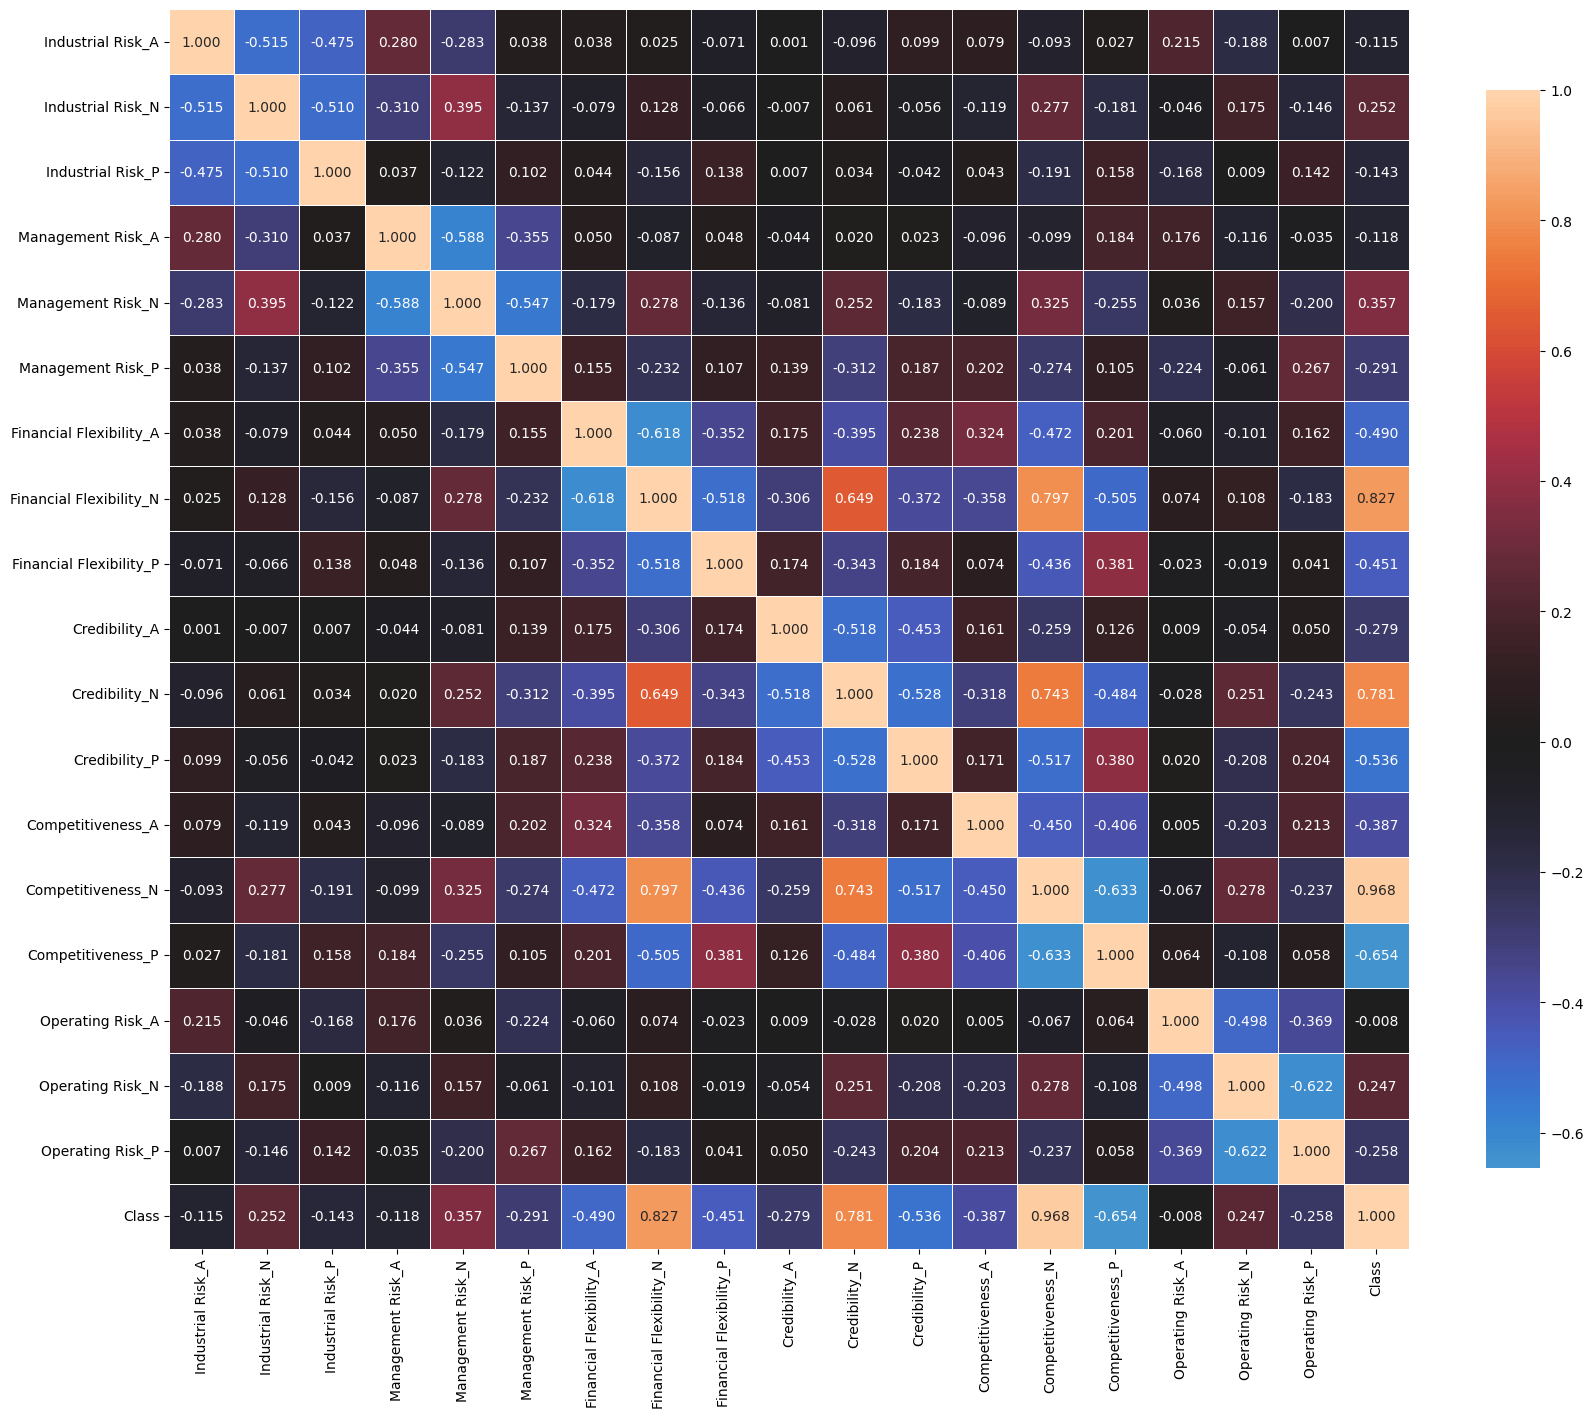

In [10]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.3f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
correlation_heatmap(df)

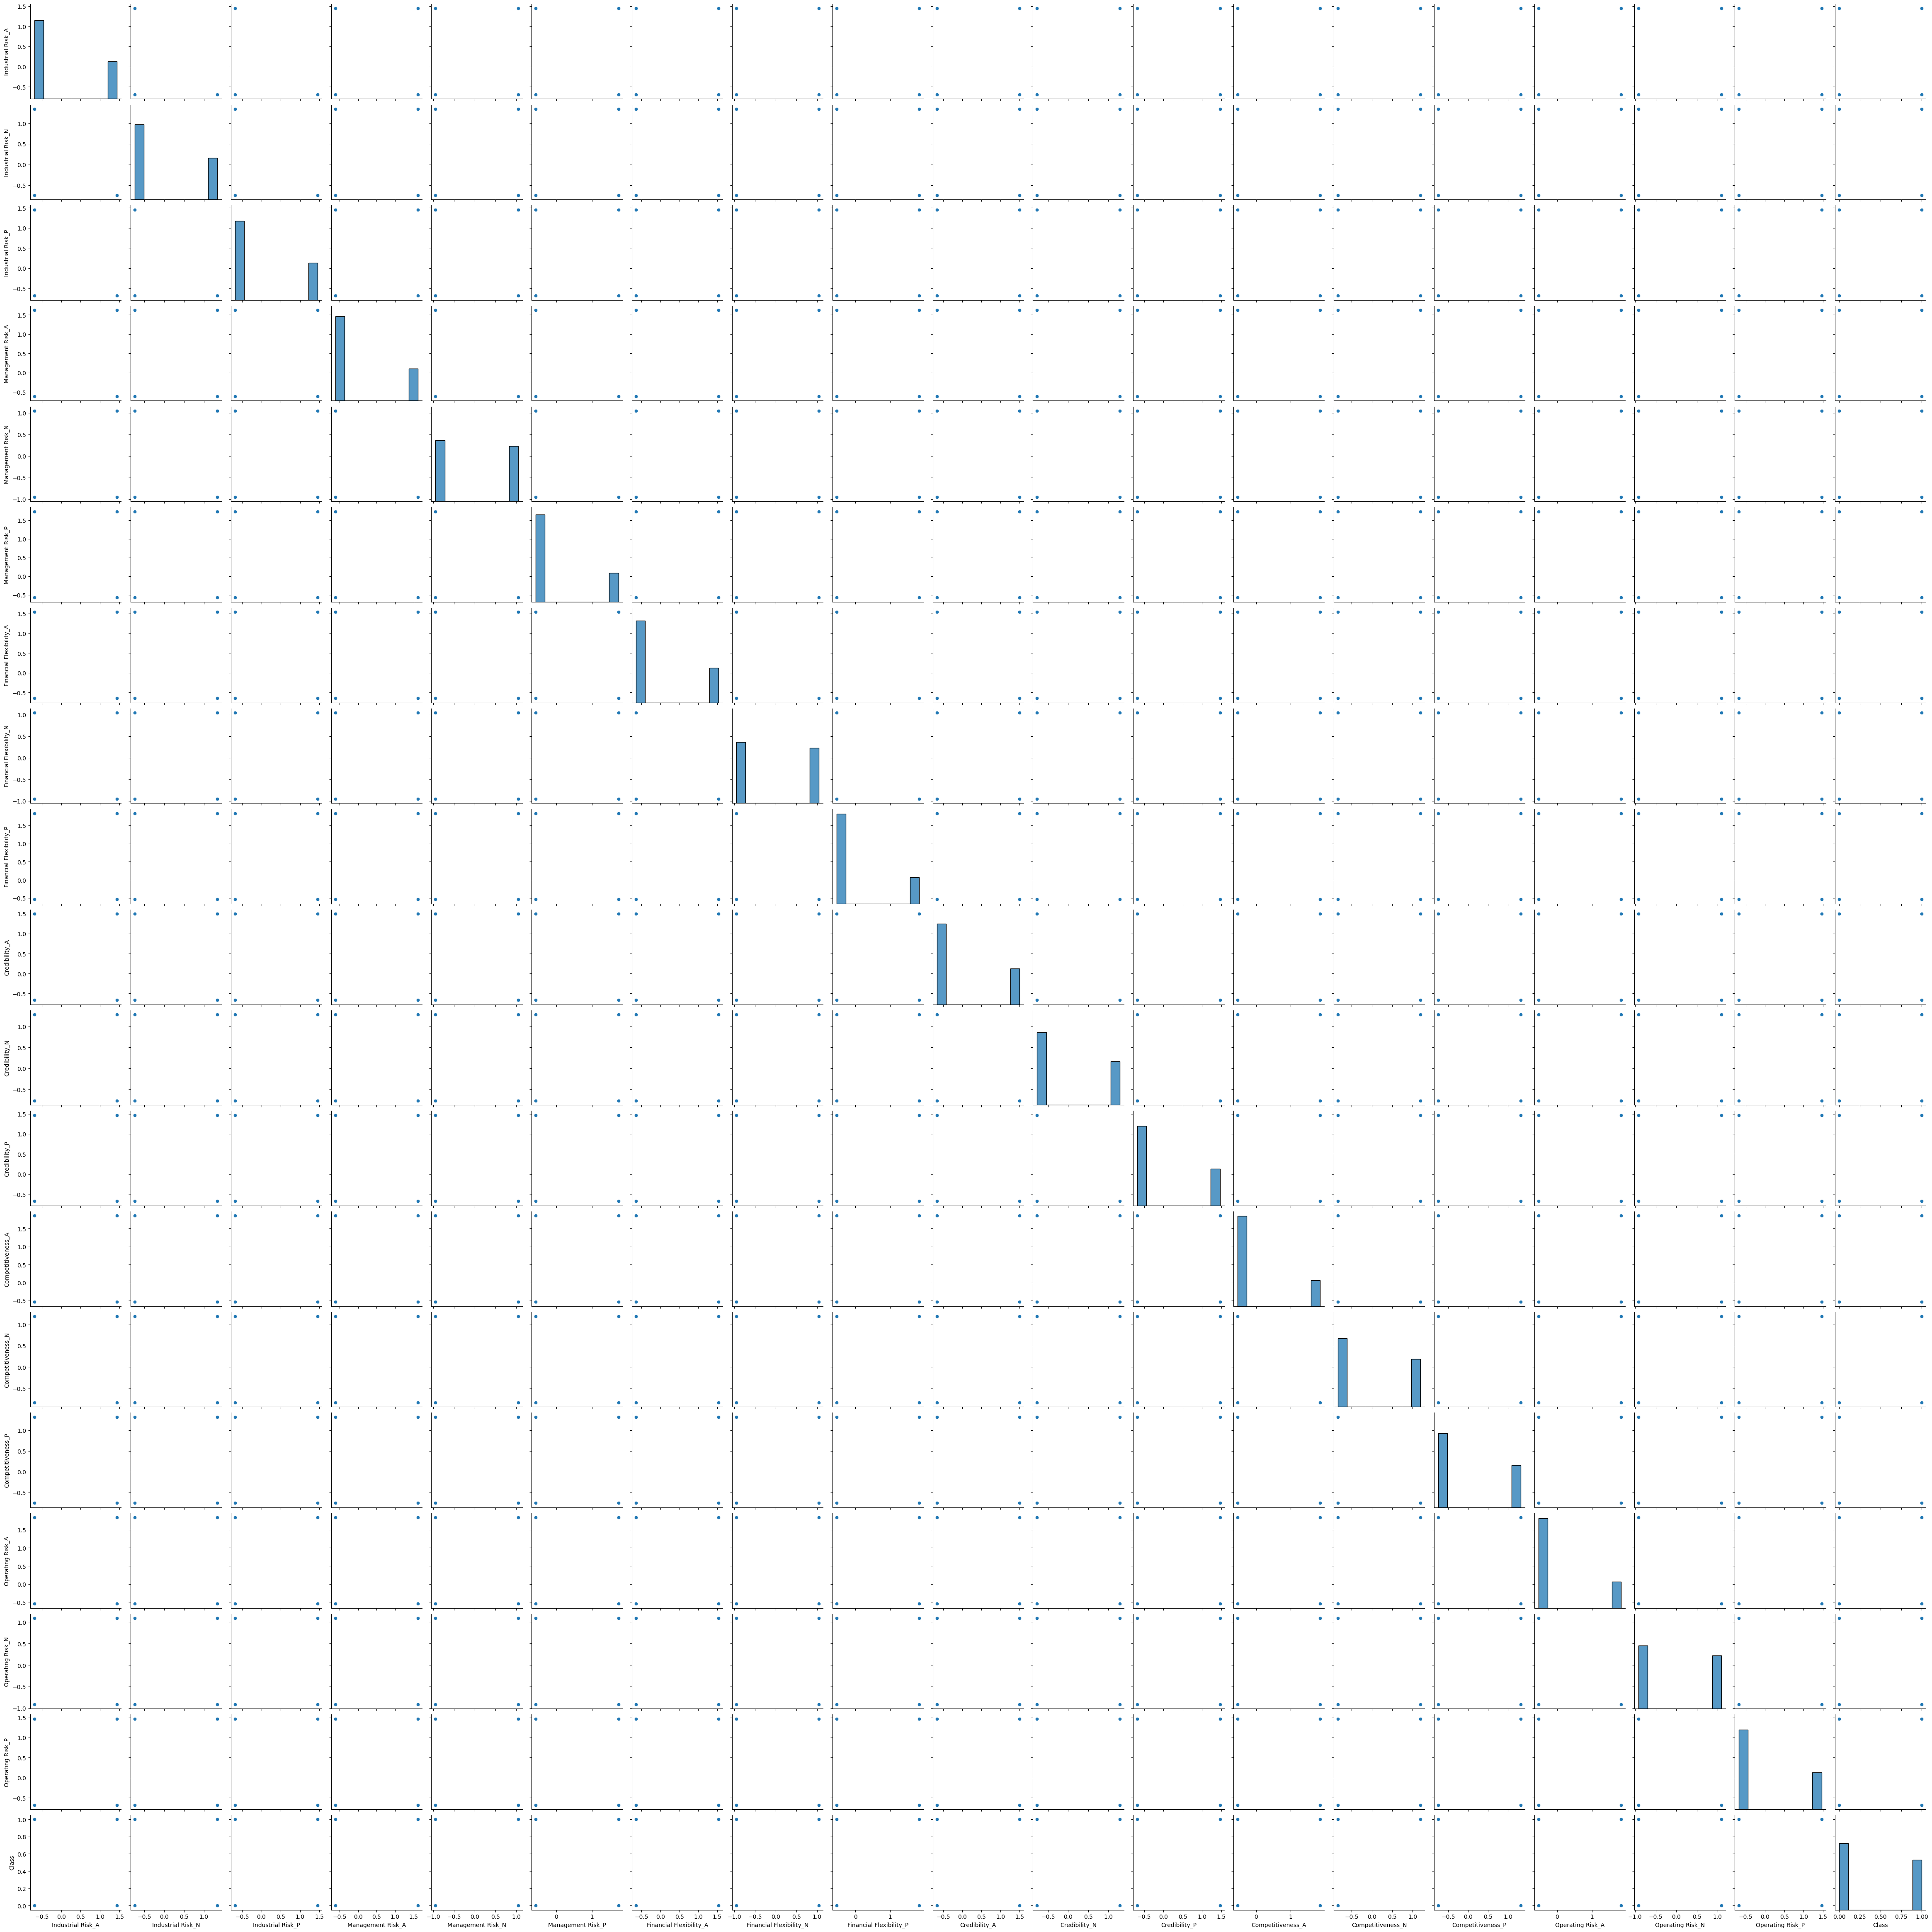

In [11]:
sns.pairplot(df)

# Start Logistic Regression

In [12]:
features = df.copy()
features = features.drop(columns=["Class"])
features = features.to_numpy()
print(features, features.shape)

[[-0.69092169 -0.74201338  1.45481958 ... -0.54236099 -0.91371897
   1.4682979 ]
 [-0.69092169  1.34229386 -0.68462098 ... -0.54236099  1.0900507
  -0.67833646]
 [ 1.44155266 -0.74201338 -0.68462098 ...  1.83641527 -0.91371897
  -0.67833646]
 ...
 [ 1.44155266 -0.74201338 -0.68462098 ... -0.54236099  1.0900507
  -0.67833646]
 [-0.69092169  1.34229386 -0.68462098 ... -0.54236099  1.0900507
  -0.67833646]
 [-0.69092169 -0.74201338  1.45481958 ...  1.83641527 -0.91371897
  -0.67833646]] (250, 18)


In [13]:
labels = df[['Class']]
labels = labels.to_numpy()
labels.shape

(250, 1)

In [14]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

In [15]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

In [46]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.01, epsilon=1e-4, max_iters=1000, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y):
        print(self.learning_rate)
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)[:, 0]
            self.w = self.w - self.learning_rate * g
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(Nt),x])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

In [18]:
def mean_squared_error(a, b):
    # Calculate the difference between the matrices
    difference = (a - b)**2
    mse = np.mean(difference)
    # Return the mean squared error
    return mse

def mean_absolute_error(a, b):
    # Calculate the absolute difference between the matrices
    difference = np.mean(np.abs(a - b))
    return difference

def r_squared(a, b):
    # Calculate the mean of the first matrix
    mean = np.mean(a)
    # Calculate the difference between the matrices and the mean of the first matrix
    difference = a - b
    mean_difference = a - mean
    # Calculate the sum of squared differences
    squared_difference = difference**2
    mean_squared_difference = mean_difference**2
    # Calculate the R-squared
    r_squared = 1 - (np.sum(squared_difference) / np.sum(mean_squared_difference))
    # Return the R-squared
    return r_squared


# print("MSE", mean_squared_error(y_test, yh))
# print("MAE", mean_absolute_error(y_test, yh))
# print("R^2", r_squared(y_test, yh))

In [85]:

    
model = LogisticRegression()
training = model.fit(X_train, y_train)
yh_test = training.predict(X_test)
yh_test = yh_test.reshape(-1, 1)
yh_train = training.predict(X_train)
yh_train = yh_train.reshape(-1, 1)





0.01


MSE for logistic regression, testing set:
 0.03160309952892895
MSE for logistic regression, training set:
 0.008035167728678483
MAE for logistic regression, testing set:
 0.03622518205191706
MAE for logistic regression, training set:
 0.015925535943943032
R^2 for logistic regression, testing set:
 0.8727733513328142
R^2 for logistic regression, training set:
 0.9670149108018125


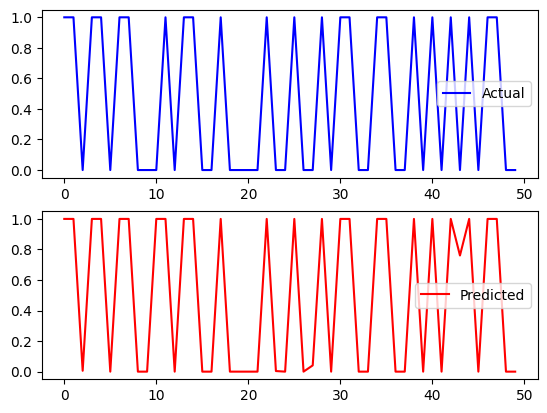

Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, 
 as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive 
 impact on the model's prediction, while a feature with a large negative weight 
 will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [ 3.83009607 -0.46609062  1.15714465 -0.7201398  -0.70187358  2.18937943
 -1.80543092 -2.48232488  4.09515561 -2.17393595 -1.40088442  3.75607926
 -2.52225368 -1.90712729  4.70858075 -3.16413013  0.19604112  0.98699278
 -1.23427306]
Importance list for dependent variable Y1:

Feature X15: 4.708580751671288
Feature X9: 4.0951556130426665
Feature X1: 3.8300960683925784
Feature X12

In [86]:
print("MSE for logistic regression, testing set:\n", mean_squared_error(y_test, yh_test))
print("MSE for logistic regression, training set:\n", mean_squared_error(y_train, yh_train))


print("MAE for logistic regression, testing set:\n", mean_absolute_error(y_test, yh_test))
print("MAE for logistic regression, training set:\n", mean_absolute_error(y_train, yh_train))


print("R^2 for logistic regression, testing set:\n", r_squared(y_test, yh_test))
print("R^2 for logistic regression, training set:\n", r_squared(y_train, yh_train))

#Second plot
plt.subplot(2, 1, 1)
plt.plot(y_test, color='blue', label='Actual')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(yh_test, color='red', label='Predicted')
plt.legend()
plt.show()
print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, \n as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive \n impact on the model's prediction, while a feature with a large negative weight \n will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", model.w)
print("Importance list for dependent variable Y1:\n")
importance = sorted(zip(range(18), model.w), key=lambda x: abs(x[1]), reverse=True)
for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")

# Adding more data to the test set

0.01
0.01
0.01
0.01
0.01
0.01
0.01
1.1124195814807589e-06 2.313593302148969e-05 4.259706461154541e-06 0.004339995914439224 0.006654954816293351 0.00035678437512967143 0.009107411515485844 

0.008128941355810415 0.010635295811393403 0.010770129783973887 0.007997699323627252 0.00910140636653903 0.01378972506650441 0.02534882856760071


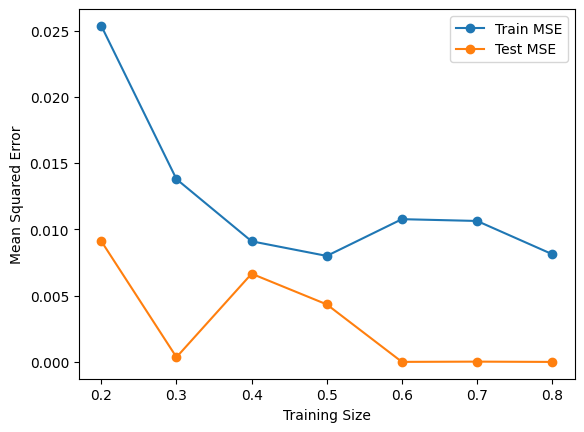

In [53]:
def LogisticRegressionDiffSize(ratio):
    X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=ratio)
    model = LogisticRegression()
    training = model.fit(X_train, y_train)
    yh_test = training.predict(X_test)
    yh_test = yh_test.reshape(-1, 1)
    yh_train = training.predict(X_train)
    yh_train = yh_train.reshape(-1, 1)
    return mean_squared_error(y_test, yh_test), mean_squared_error(y_train, yh_train)

mse_subset_20, mse_train_subset_20 = LogisticRegressionDiffSize(0.2)
mse_subset_30, mse_train_subset_30 = LogisticRegressionDiffSize(0.3)
mse_subset_40, mse_train_subset_40 = LogisticRegressionDiffSize(0.4)
mse_subset_50, mse_train_subset_50 = LogisticRegressionDiffSize(0.5)
mse_subset_60, mse_train_subset_60 = LogisticRegressionDiffSize(0.6)
mse_subset_70, mse_train_subset_70 = LogisticRegressionDiffSize(0.7)
mse_subset_80, mse_train_subset_80 = LogisticRegressionDiffSize(0.8)
print(mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80,"\n")
print(mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80)
# Define the training size and MSE values
test_sizes = [0.8,0.7,0.6,0.5,0.4,0.3,0.2]
test_mse = [mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80]
train_mse = [mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80]
plt.plot(test_sizes, train_mse, 'o-', label='Train MSE')
plt.plot(test_sizes, test_mse, 'o-', label='Test MSE')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# What happens if we change the learning rate

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
half_model = LogisticRegression(learning_rate = 0.000001)
half_training = half_model.fit(X_train, y_train)
half_yh_test = half_training.predict(X_test)
half_yh_test = half_yh_test.reshape(-1, 1)
half_yh_train = half_training.predict(X_train)
half_yh_train = half_yh_train.reshape(-1, 1)

1e-06


MSE for logistic regression, testing set:
 0.20438138449478577
MSE for logistic regression, training set:
 0.20268889609110738
MAE for logistic regression, testing set:
 0.4517277579931638
MAE for logistic regression, training set:
 0.44988339144237094
R^2 for logistic regression, testing set:
 0.17053009539453845
R^2 for logistic regression, training set:
 0.17058252238933036


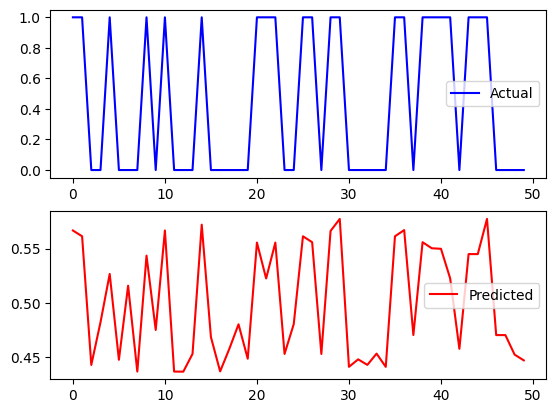

Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, 
 as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive 
 impact on the model's prediction, while a feature with a large negative weight 
 will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [-0.00427857 -0.00727903  0.01350883 -0.00656335 -0.00494612  0.01721555
 -0.01478945 -0.0246326   0.04200117 -0.02319626 -0.01401207  0.03880256
 -0.0265131  -0.0187498   0.04781913 -0.03267003 -0.00082778  0.00988437
 -0.0098421 ]
Importance list for dependent variable Y1:

Feature X15: 0.04781913423026303
Feature X9: 0.04200116926724963
Feature X12: 0.038802555021472285
Featu

In [23]:
print("MSE for logistic regression, testing set:\n", mean_squared_error(y_test, half_yh_test))
print("MSE for logistic regression, training set:\n", mean_squared_error(y_train, half_yh_train))


print("MAE for logistic regression, testing set:\n", mean_absolute_error(y_test, half_yh_test))
print("MAE for logistic regression, training set:\n", mean_absolute_error(y_train, half_yh_train))


print("R^2 for logistic regression, testing set:\n", r_squared(y_test, half_yh_test))
print("R^2 for logistic regression, training set:\n", r_squared(y_train, half_yh_train))

#Second plot
plt.subplot(2, 1, 1)
plt.plot(y_test, color='blue', label='Actual')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(half_yh_test, color='red', label='Predicted')
plt.legend()
plt.show()
print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, \n as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive \n impact on the model's prediction, while a feature with a large negative weight \n will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", half_model.w)
print("Importance list for dependent variable Y1:\n")
importance = sorted(zip(range(18), half_model.w), key=lambda x: abs(x[1]), reverse=True)
for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
big_model = LogisticRegression(learning_rate = 1.0)
big_training = big_model.fit(X_train, y_train)
big_yh_test_ = big_training.predict(X_test)
big_yh_test_ = big_yh_test_.reshape(-1, 1)
big_yh_train_ = big_training.predict(X_train)
big_yh_train_ = big_yh_train_.reshape(-1, 1)

1.0


MSE for logistic regression, testing set:
 0.0
MSE for logistic regression, training set:
 0.02
MAE for logistic regression, testing set:
 0.0
MAE for logistic regression, training set:
 0.02
R^2 for logistic regression, testing set:
 1.0
R^2 for logistic regression, training set:
 0.9178981937602627


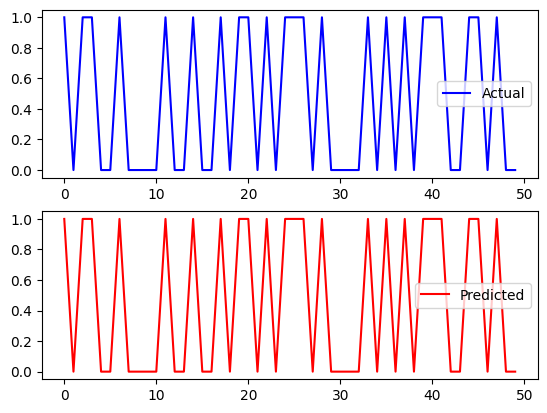

Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, 
 as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive 
 impact on the model's prediction, while a feature with a large negative weight 
 will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [ 41999.35017051  -5561.50142033  11563.72436317  -6289.9343735
  -3554.2562126   15003.21991049 -13671.70541972 -23899.96910106
  39981.98139323 -21589.76869437 -14993.76269496  39575.42069359
 -26343.48154875 -17732.76967141  46019.49728683 -31710.34210932
   3387.34338605  11718.05282655 -15610.30276289]
Importance list for dependent variable Y1:

Feature X15: 46019.497286825

In [25]:
print("MSE for logistic regression, testing set:\n", mean_squared_error(y_test, big_yh_test_))
print("MSE for logistic regression, training set:\n", mean_squared_error(y_train, big_yh_train_))


print("MAE for logistic regression, testing set:\n", mean_absolute_error(y_test, big_yh_test_))
print("MAE for logistic regression, training set:\n", mean_absolute_error(y_train, big_yh_train_))


print("R^2 for logistic regression, testing set:\n", r_squared(y_test, big_yh_test_))
print("R^2 for logistic regression, training set:\n", r_squared(y_train, big_yh_train_))

#Second plot
plt.subplot(2, 1, 1)
plt.plot(y_test, color='blue', label='Actual')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(big_yh_test_, color='red', label='Predicted')
plt.legend()
plt.show()
print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, \n as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive \n impact on the model's prediction, while a feature with a large negative weight \n will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", big_model.w)
print("Importance list for dependent variable Y1:\n")
importance = sorted(zip(range(18), big_model.w), key=lambda x: abs(x[1]), reverse=True)
for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
s_model = LogisticRegression(learning_rate = 0.001)
s_training = s_model.fit(X_train, y_train)
s_yh_test_ = s_training.predict(X_test)
s_yh_test_ = s_yh_test_.reshape(-1, 1)
s_yh_train_ = s_training.predict(X_train)
s_yh_train_ = s_yh_train_.reshape(-1, 1)

0.001


MSE for logistic regression, testing set:
 0.03999999432176798
MSE for logistic regression, training set:
 0.014996486089976542
MAE for logistic regression, testing set:
 0.039999997160896035
MAE for logistic regression, training set:
 0.015005119428828593
R^2 for logistic regression, testing set:
 0.8389694270460226
R^2 for logistic regression, training set:
 0.9384380702381916


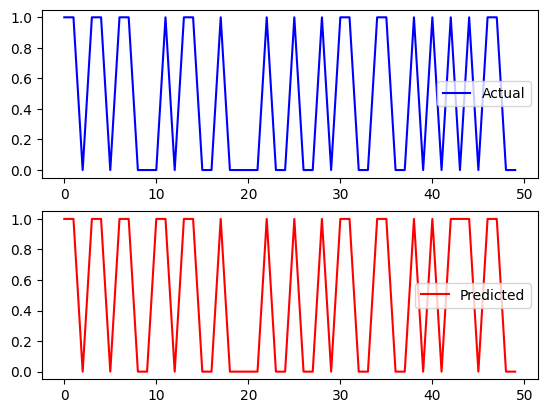

Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, 
 as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive 
 impact on the model's prediction, while a feature with a large negative weight 
 will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [ 41.63199229  -4.51173604  11.56450359  -7.34392889  -6.91462099
  21.9869839  -18.26985106 -24.97617983  40.97818172 -21.60465527
 -13.92243472  37.5196138  -25.26543984 -18.94369557  47.03852842
 -31.70348435   2.17435325   9.7297608  -12.38563367]
Importance list for dependent variable Y1:

Feature X15: 47.03852841777976
Feature X1: 41.63199229173199
Feature X9: 40.978181723

In [27]:
print("MSE for logistic regression, testing set:\n", mean_squared_error(y_test, s_yh_test_))
print("MSE for logistic regression, training set:\n", mean_squared_error(y_train, s_yh_train_))


print("MAE for logistic regression, testing set:\n", mean_absolute_error(y_test, s_yh_test_))
print("MAE for logistic regression, training set:\n", mean_absolute_error(y_train, s_yh_train_))


print("R^2 for logistic regression, testing set:\n", r_squared(y_test, s_yh_test_))
print("R^2 for logistic regression, training set:\n", r_squared(y_train, s_yh_train_))

#Second plot
plt.subplot(2, 1, 1)
plt.plot(y_test, color='blue', label='Actual')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(s_yh_test_, color='red', label='Predicted')
plt.legend()
plt.show()
print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, \n as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive \n impact on the model's prediction, while a feature with a large negative weight \n will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", s_model.w)
print("Importance list for dependent variable Y1:\n")
importance = sorted(zip(range(18), s_model.w), key=lambda x: abs(x[1]), reverse=True)
for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")

# Implementing Stochastic Gradient Descent

In [28]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size = 4):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.batch_size = batch_size
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        total_samples = x.shape[0]
        mse_list = []
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            for i in range(0, total_samples, self.batch_size):
                mini_batch_x  = x[i: i+self.batch_size]
                mini_batch_y  = y[i: i+self.batch_size]
                grad, mse = gradient_fn(mini_batch_x, mini_batch_y, w)              # compute the gradient with present weight
                mse_list.append(mse)
                self.w_history.append(w)
                w = w - self.learning_rate * grad         # weight update step
                if self.record_history:
                    self.w_history.append(w)
                t += 1
        return w, mse_list

In [29]:
class sgd_LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        N,D = x.shape
        def gradient(x, y,w):
            N,D = x.shape
            yh = logistic(np.dot(x, w))    # predictions  size N
            grad = np.dot(np.transpose(x), yh - y)/N        # divide by N because cost is mean over N points
            return grad[:, 0] ,mean_squared_error(y,yh.reshape(-1, 1))                         # size D
        w0 = np.zeros(D)  
        self.w, mse_list =  optimizer.run(gradient, x, y, w0)
        # t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self, mse_list
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(Nt),x])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

# LogisticRegression.gradient = gradient

In [54]:
def growing_mini_batches(size):
    optimizer = GradientDescent(learning_rate=.001, max_iters=1000, record_history=True, batch_size=size)

    m = sgd_LogisticRegression()
    train,x = m.fit(features,labels,optimizer)
    yh =  train.predict(features)
    yh =  yh.reshape(-1, 1)
    return mean_squared_error(labels, yh)

print(growing_mini_batches(8))
print(growing_mini_batches(16))
print(growing_mini_batches(32))
print(growing_mini_batches(64))
print(growing_mini_batches(128))
print(growing_mini_batches(250))

0.05464249683226369
0.050352271127266084
0.045635757042639995
0.0380863623930768
0.03444535576106949
0.03351257449042144


# Convergence Rate

mse for batch {mini_batch_size[i]}:  0.011907638465849907
mse for batch {mini_batch_size[i]}:  0.009535656092222055
mse for batch {mini_batch_size[i]}:  0.010143908149199637
mse for batch {mini_batch_size[i]}:  0.008188823409855177
mse for batch {mini_batch_size[i]}:  0.008671544509611115
mse for batch {mini_batch_size[i]}:  0.008725465534533967


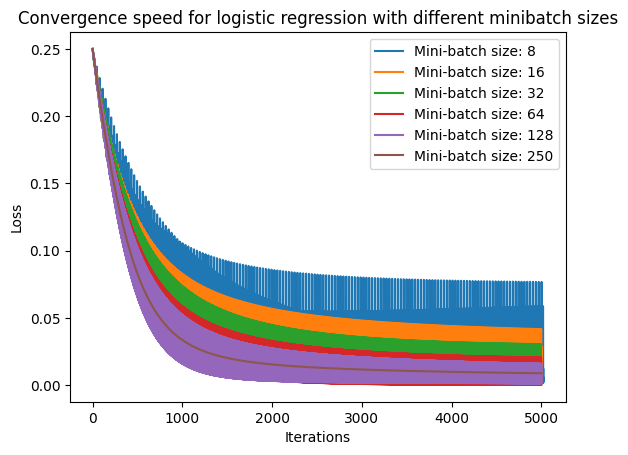

In [31]:
def growing_mini_batches(size):
    optimizer = GradientDescent(learning_rate=.001, max_iters=5000, record_history=True, batch_size=size)
    m = sgd_LogisticRegression()
    train, loss = m.fit(features,labels,optimizer)
    yh =  train.predict(features)
    yh =  yh.reshape(-1, 1)
    indices = list(range(len(loss)))
    return mean_squared_error(labels, yh), loss
losses = []
mini_batch_size = [8,16,32,64,128,250]
for i in mini_batch_size:
    mse, loss = growing_mini_batches(i)
    losses.append(loss)
    print("mse for batch {mini_batch_size[i]}: ", mse)
for i, losses in enumerate(losses):
    iterations = range(len(losses))
    plt.plot(iterations, losses, label=f'Mini-batch size: {mini_batch_size[i]}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence speed for logistic regression with different minibatch sizes')
plt.legend()
plt.show()

In [83]:
def different_learning_rates(rate):
    X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
    optimizer = GradientDescent(learning_rate=rate, max_iters=1000, record_history=True, batch_size=8)
    # labels  = np.array(labels)
    # features  = np.array(features)
    m = sgd_LogisticRegression()
    train, loss = m.fit(X_train,y_train,optimizer)
    yh =  train.predict(X_test)
    yh =  yh.reshape(-1, 1)
    return mean_squared_error(y_test, yh)
print(different_learning_rates(0.01))
print(different_learning_rates(0.1))
print(different_learning_rates(0.5))
print(different_learning_rates(1))

0.007196047948034348
0.020000693399861342
7.143740805294958e-69
0.0
